In [1]:
import os
import io
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
import numpy as np
import glob
import re
import pandas as pd
import ipyplot
import ipywidgets as widgets
%matplotlib inline

In [2]:
def find_PN_single(img_org):
    text = pytesseract.image_to_string(img_org)
    m = re.search('PN(.+?)\n', text)
    if m: 
        found = m.group(1)
        found = "PN" + found
        print(found)
        return found
    else:
        print("PN number not found")

In [3]:
def on_click_classify(change):
    for name, file_info in btn_upload.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    out_pl.clear_output()
    with out_pl: display(img)
    text = find_PN_single(img)
    lbl_pred.value = f'Prediction: {text}'

In [4]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='OCR')
btn_run.on_click(on_click_classify)

PN:5B20R55839


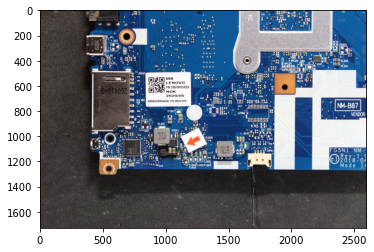

In [5]:
#hide_output
widgets.VBox([widgets.Label('Select your Serial Number Image'), 
      btn_upload, btn_run, out_pl, lbl_pred])